In [1]:
from shemaFuncs import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set(rc={'figure.figsize':(20, 16)})
sns.set_context("talk")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)


globalColumnNames = ['indexID', 'text', 'version', 'book', 'chapter', 'verse', 'isHeb', 'isEng']


In [2]:
# load in hebrew torah texts and metadata; create a DF
heb_text, heb_version, heb_book, heb_chapter, heb_verse = loadHebTorah()
heb_version = ['Hebrew Text'] * len(heb_version)
heb_text = np.array(heb_text)
heb_version = np.array(heb_version)
heb_book = np.array(heb_book)
heb_chapter = np.array(heb_chapter)
heb_verse = np.array(heb_verse)
hebIndex = [ b+'.'+str(c)+'.'+str(v) for b, c, v in zip(heb_book, heb_chapter, heb_verse)]
hebIndex = np.array(hebIndex)
heb_isHeb = [1] * len(hebIndex)
heb_isHeb = np.array(heb_isHeb)
heb_isEng = [0] * len(hebIndex)
heb_isEng = np.array(heb_isEng)

hebDf = pd.DataFrame(np.vstack([hebIndex, 
                      heb_text, 
                      heb_version, 
                      heb_book, 
                      heb_chapter, 
                      heb_verse, 
                      heb_isHeb, 
                      heb_isEng]).T,
                     columns = globalColumnNames)
print("\n***here is the hebrew dataframe:\n")
print(hebDf.head())

####
## load in english torah texts and metadata; create a DF

# first text 
_, eng_text = loadTest()
# remove HTML tags
removeTags = lambda x: re.sub(r'<.*?>', '', x)
vecRemoveTags = np.vectorize(removeTags)
eng_text = vecRemoveTags(eng_text)
# remove non-alpha characters
cleanEnglish = lambda x: re.sub(r'[^A-Za-z ]+', '', x)
vecCleanEnglish = np.vectorize(cleanEnglish)
eng_text = vecCleanEnglish(eng_text)
# make all lower case
allLower = lambda x: x.lower()
vecAllLower = np.vectorize(allLower)
eng_text = vecAllLower(eng_text)

# load in english torah metadata
_, eng_metaData, = loadBookVersions()

eng_version, eng_version_book, eng_version_chapter, eng_version_verse = eng_metaData
eng_version = np.array(eng_version)
eng_version_book = np.array(eng_version_book)
eng_version_chapter = np.array(eng_version_chapter)
eng_version_verse = np.array(eng_version_verse)
eng_isHeb = [0] * len(eng_text)
eng_isHeb = np.array(eng_isHeb)
eng_isEng = [1] * len(eng_text)
eng_isEng = np.array(eng_isEng)
engIndex = [ b+'.'+str(c)+'.'+str(v) for b, c, v in zip(eng_version_book, eng_version_chapter, eng_version_verse)]
engIndex = np.array(engIndex)

engDf = pd.DataFrame(np.vstack([engIndex, 
                      eng_text, 
                      eng_version, 
                      eng_version_book, 
                      eng_version_chapter, 
                      eng_version_verse, 
                      eng_isHeb, 
                      eng_isEng]).T,
                     columns = globalColumnNames)
print("\n***here is the english dataframe:\n")
print(engDf.head())

# create a pivoted engDf, to match the rows of the hebrewDf.
# save it as copy, and make another copy, to add stuff to it. 
# make a copy of the hebrew too.

engDfPivoted = engDf.pivot(index='indexID', columns='version', values='text').copy()
engDfPivotedCopy = engDfPivoted.copy()
hebDfCopy = hebDf.copy
print("\n***here is the pivotedenglish dataframe:\n")
print(engDfPivoted.head())


# create sets for each verse of each version
getSets = lambda x: set(x.split())
getSets = np.vectorize(getSets)

englishVerseSets = getSets(eng_text)
hebrewVerseSets = getSets(heb_text)

print("\n***here are the english verse sets:\n")
print(englishVerseSets[:5])
print("\n***here are the hebrew verse sets:\n")
print(hebrewVerseSets[:5])

# get length of each verse
getCount = lambda x: len(x.split())
getCount = np.vectorize(getCount)

englishVerseLengths = getCount(eng_text)
hebrewVerseLengths = getCount(heb_text)

print("\n***here are the english verse lengths:\n")
print(englishVerseLengths[:5])
print("\n***here are the hebrew verse lengths:\n")
print(hebrewVerseLengths[:5])

# get the length of each verse set
getSetLength = lambda x: len(x)
getSetLength = np.vectorize(getSetLength)

englishSetLengths = getSetLength(englishVerseSets)
hebrewSetLengths = getSetLength(hebrewVerseSets)

print("\n***here are the english set lengths:\n")
print(englishSetLengths[:5])
print("\n***here are the hebrew set lengths:\n")
print(hebrewSetLengths[:5])

# calculate verse complexity: setLength / verseLength

engVerseComplexity = englishSetLengths / englishVerseLengths
hebVerseComplexity = hebrewSetLengths / hebrewVerseLengths

print("\n***here are the hebrew verse complexities:\n")
print(englishSetLengths[:5])
print("\n***here are the hebrew verse complexities:\n")
print(hebrewSetLengths[:5])
(hebVerseComplexity == np.nan).sum()


***here is the hebrew dataframe:

       indexID                                               text  \
0  Genesis.1.1                 בראשית ברא אלהים את השמים ואת הארץ   
1  Genesis.1.2  והארץ היתה תהו ובהו וחשך על־פני תהום ורוח אלהי...   
2  Genesis.1.3                       ויאמר אלהים יהי אור ויהי־אור   
3  Genesis.1.4  וירא אלהים את־האור כי־טוב ויבדל אלהים בין האור...   
4  Genesis.1.5  ויקרא אלהים לאור יום ולחשך קרא לילה ויהי־ערב ו...   

       version     book chapter verse isHeb isEng  
0  Hebrew Text  Genesis       1     1     1     0  
1  Hebrew Text  Genesis       1     2     1     0  
2  Hebrew Text  Genesis       1     3     1     0  
3  Hebrew Text  Genesis       1     4     1     0  
4  Hebrew Text  Genesis       1     5     1     0  

***here is the english dataframe:

       indexID                                               text  \
0  Genesis.1.1          when god began to create heaven and earth   
1  Genesis.1.2  the earth being unformed and void with darknes..

<ipython-input-2-26423d1ef672>:122: RuntimeWarning: invalid value encountered in true_divide
  engVerseComplexity = englishSetLengths / englishVerseLengths


0

In [3]:
## plots
unique = engDf["version"].append(hebDf["version"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})
alphaParam = 1/len(pd.unique(engDf["version"]))

(0.0, 1.0)

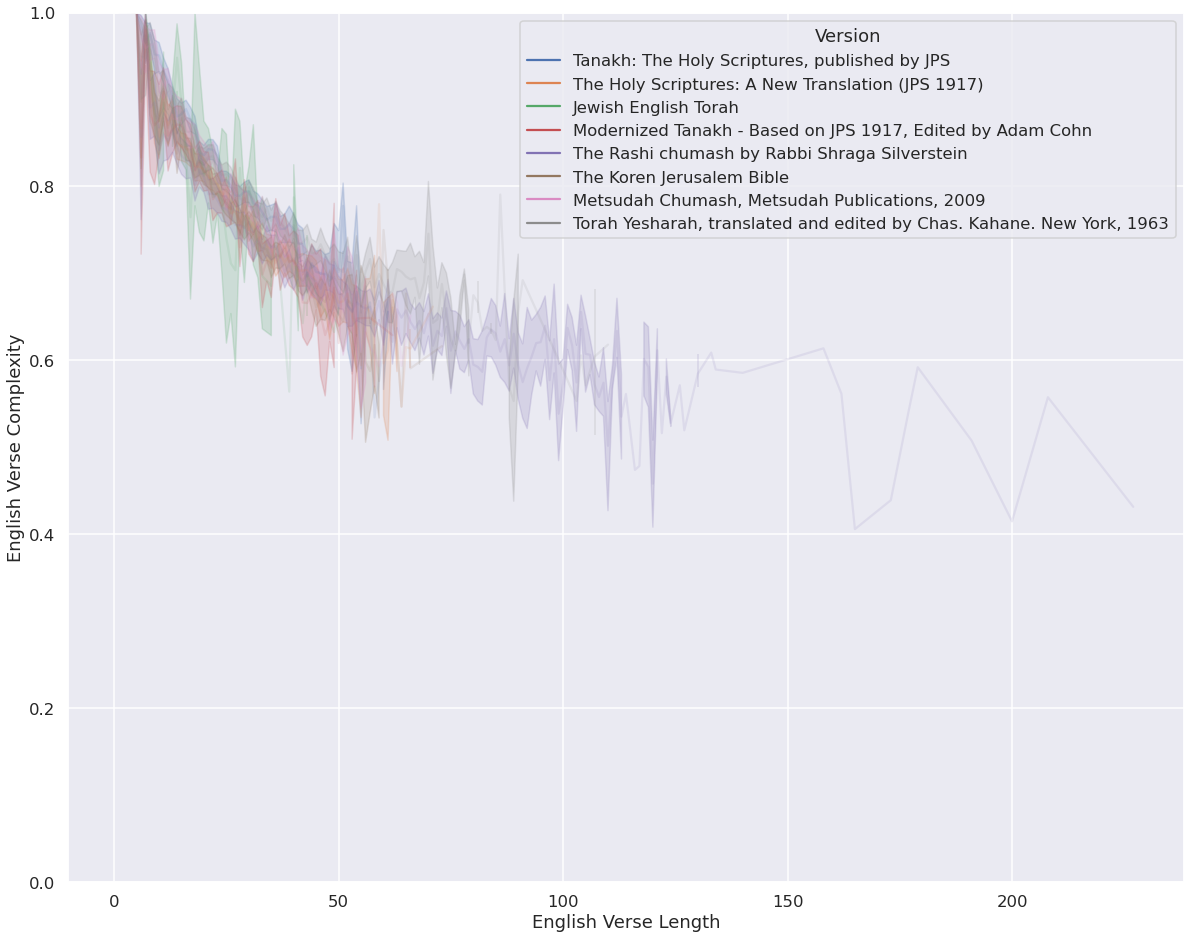

In [4]:
# do a line plot of complexity vs length for better visualization
# plot ENGLISH complexity vs length
tempDf = pd.DataFrame()
tempDf['English Verse Complexity'] = engVerseComplexity
tempDf['English Verse Length'] = englishVerseLengths
tempDf['Version'] = eng_version
sns.lineplot(data=tempDf, 
             x='English Verse Length', 
             y='English Verse Complexity', 
             hue='Version', 
             palette=palette,
             alpha=alphaParam)
plt.ylim(0,1)

(0.0, 1.0)

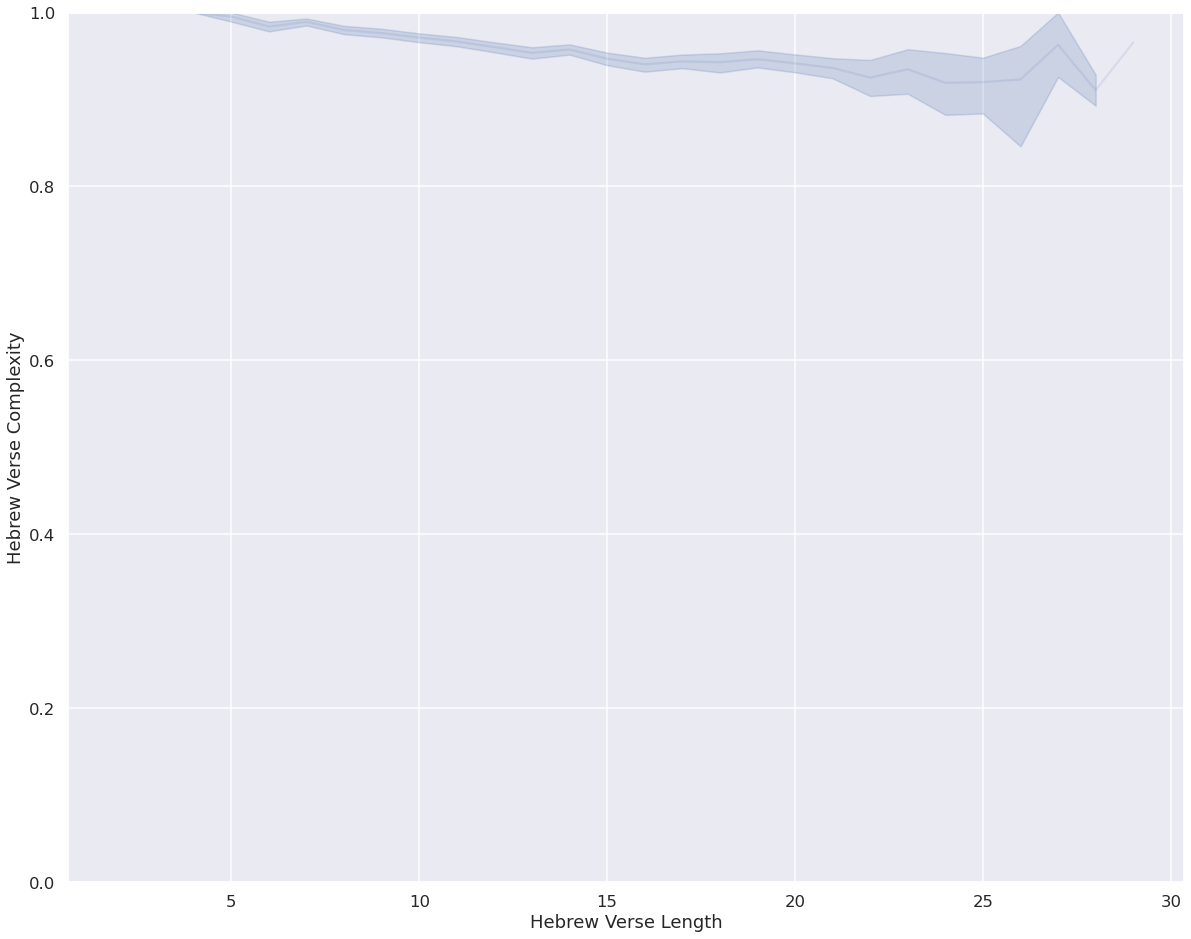

In [5]:
tempDf = pd.DataFrame()
tempDf['Hebrew Verse Complexity'] = hebVerseComplexity
tempDf['Hebrew Verse Length'] = hebrewVerseLengths
tempDf['Version'] = heb_version
sns.lineplot(data=tempDf, 
             x='Hebrew Verse Length', 
             y='Hebrew Verse Complexity', 
             # hue='Version',
             palette=palette,
             alpha=alphaParam)
plt.ylim(0,1)

In [6]:
# load in hebrew torah texts and metadata
heb_torah_text, heb_torah_version, heb_torah_book, heb_torah_chapter, heb_torah_verse = loadHebTorah()
heb_torah_version = ['Hebrew Text'] * len(heb_torah_version)
heb_torah_text = np.array(heb_torah_text)
heb_torah_version = np.array(heb_torah_version)
heb_torah_book = np.array(heb_torah_book)
heb_torah_chapter = np.array(heb_torah_chapter)
heb_torah_verse = np.array(heb_torah_verse)

# load in english torah texts
_, y_test = loadTest()

removeTags = lambda x: re.sub(r'<.*?>', '', x)
vecRemoveTags = np.vectorize(removeTags)
y_test = vecRemoveTags(y_test)

cleanEnglish = lambda x: re.sub(r'[^A-Za-z ]+', '', x)
vecCleanEnglish = np.vectorize(cleanEnglish)
y_test = vecCleanEnglish(y_test)

allLower = lambda x: x.lower()
vecAllLower = np.vectorize(allLower)
y_test = vecAllLower(y_test)

# load in english torah metadata
_, testVersions, = loadBookVersions()

# # make sure all lists have the same name
# for i in testVersions:
#     print(len(i))

# load in english torah metadata
eng_torah_version, eng_torah_book, eng_torah_chapter, eng_torah_verse = testVersions
eng_torah_version = np.array(eng_torah_version)
eng_torah_book = np.array(eng_torah_book)
eng_torah_chapter = np.array(eng_torah_chapter)
eng_torah_verse = np.array(eng_torah_verse)


hebIndex = [ b+'.'+str(c)+'.'+str(v) for b, c, v in zip(heb_torah_book, heb_torah_chapter, heb_torah_verse)]
hebIndex = np.array(hebIndex)
engIndex = [ b+'.'+str(c)+'.'+str(v) for b, c, v in zip(eng_torah_book, eng_torah_chapter, eng_torah_verse)]
engIndex = np.array(engIndex)

# create DFs of Torah Data
hebDf = pd.DataFrame(columns=['text', 'version', 'indexID'])
hebDf['text'] = heb_torah_text
hebDf['version'] = heb_torah_version
hebDf['indexID'] = hebIndex

getCount = lambda x: len(x.split())
vecGetCount = np.vectorize(getCount)

# count hebrew words 
hebVersLens = vecGetCount(heb_torah_text)
hebTotalWords = hebVersLens.flatten().sum()

verseLenDict = { x: y for x, y in zip(hebIndex, hebVersLens)}

# count english words
engVersLens = vecGetCount(y_test)

# get sets of english words
getSets = lambda x: set(x.split())
vecGetSets = np.vectorize(getSets)
engVersSets = vecGetSets(y_test)

engDf = pd.DataFrame(columns=['text', 'version', 'indexID'])
engDf['text'] = y_test
engDf['version'] = eng_torah_version
engDf['indexID'] = engIndex
engDf = engDf.pivot(index='indexID', columns='version', values='text')

# this is getting a set of words shared by all versions of an english verse
def getRowSharedSets(x):
    x = x[pd.isnull(x) == False]
    x = vecGetSets(x).tolist()
    x = set.intersection(*x)
    return x

# get sets for row totals ENG DF
totalEngVersSets = np.apply_along_axis(getRowSharedSets, axis=1, arr=engDf.values )

# create dict for verse sets Y TEST
globalVerseSetsDict = { x: y for x, y in zip(engDf.index, totalEngVersSets)}
temp = np.array([ globalVerseSetsDict[x] for x in engIndex ])

# this calculates the percent of a version's verse set is used in the shared words set
def getPercentSharedSets(verseSet, GlobalSharedSet):
    try:
        return len(verseSet & GlobalSharedSet) / len(verseSet) 
    except:
        return np.nan

percentSharedSet = [ getPercentSharedSets(x, y) for x, y in zip(engVersSets, temp) ]
percentSharedSet = np.array(percentSharedSet)

# percent of concated verses is in global set ENG DF
# gets all the words for a version (in english) and calcs what percent are part of shared words set
def concatRowItems(x):
    x = x[pd.isnull(x) == False]
    x = np.array(' '.join(x))
    return x

temp = np.apply_along_axis(concatRowItems, axis=1, arr=engDf.values )

def percAllVersIsGlobSet(x, y):
    x = x.tolist().split()
    inInSet = np.array([ i in y for i in x])
    out = inInSet.sum() / inInSet.shape[0]
    return out

percAllVersInGlbSets = [ percAllVersIsGlobSet(x, y) for x, y in zip(temp, totalEngVersSets)]

globalPercAllInGlbSetDict = { x: y for x, y in zip(engDf.index, percAllVersInGlbSets)}

globalVerseConcatPercentInSharedSet = np.array([ globalPercAllInGlbSetDict[x] for x in engIndex ])

def percAllVersSetIsGlobSet(x, y):
    x = x.tolist().split()
    x = set(x)
    try:
        return len(x & y) / len(x)
    except:
        return np.nan

temp2 = [ percAllVersSetIsGlobSet(x, y) for x, y in zip(temp, totalEngVersSets)]
tempDict = { x: y for x, y in zip(engDf.index, temp2)}
globalVerseSetPercentInSharedSet = np.array([ tempDict[x] for x in engIndex ])

# this calculates the percent of words in a verse are part of the shared words set
def percVersIsGlobSet(x, y):
    if pd.isnull(x) == False:
        x = x.split()
        if len(x) > 0:
            inInSet = np.array([ i in y for i in x])
            out = inInSet.sum() / len(inInSet)
            return out
        else:
            return np.nan
    else:
        return np.nan
    

temp = np.array([ globalVerseSetsDict[x] for x in engIndex ])
versePercentInSharedSet = [ percVersIsGlobSet(x, y) for x, y in zip(y_test, temp)]


def numOfNonNan(aRow):
    out = (pd.isnull(aRow) == False).sum()
    return out

numOfNonNans = np.apply_along_axis(numOfNonNan, axis=1, arr=engDf.values )

numOfNonNansDict = { x: y for x,y in zip(engDf.index, numOfNonNans)}

y_testNonNans = np.array([ numOfNonNansDict[x] for x in engIndex ])

In [7]:
engDfLong = pd.DataFrame()
engDfLong['indexID'] = engIndex

temp = np.array([ verseLenDict[x] for x in engIndex ])
engDfLong['Hebrew Verse Length'] = temp
engDfLong['English Verse Length'] = engVersLens
engDfLong['Version'] = eng_torah_version
engDfLong['Percent of Single-Version-Verse-Set in All-Versions-Verse-Shared-Words-Set'] = percentSharedSet 
engDfLong['Percent of All-Versions-Verse-Set in All-Versions-Verse-Shared-Words-Set'] = globalVerseSetPercentInSharedSet
engDfLong['Relative-to-All Percent of Set in Shared Set'] = globalVerseSetPercentInSharedSet /percentSharedSet
engDfLong['Percent of Single-Version-Verse-Words in All-Versions-Verse-Shared-Words-Set'] = versePercentInSharedSet
engDfLong['Percent of All-Versions-Verse-Words in All-Versions-Verse-Shared-Words-Set'] = globalVerseConcatPercentInSharedSet 
engDfLong['Relative-to-All Percent of Words in Shared Set'] = globalVerseConcatPercentInSharedSet / versePercentInSharedSet
engDfLong['Relative Verbosity to Hebrew'] = engDfLong['English Verse Length'] / engDfLong['Hebrew Verse Length'] 

<ipython-input-7-ee9aa80391e4>:10: RuntimeWarning: invalid value encountered in true_divide
  engDfLong['Relative-to-All Percent of Set in Shared Set'] = globalVerseSetPercentInSharedSet /percentSharedSet
<ipython-input-7-ee9aa80391e4>:13: RuntimeWarning: invalid value encountered in true_divide
  engDfLong['Relative-to-All Percent of Words in Shared Set'] = globalVerseConcatPercentInSharedSet / versePercentInSharedSet


In [8]:
unique = engDfLong["Version"].append(hebDf["version"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})
alphaParam = 1/len(pd.unique(engDfLong["Version"]))

(0.0, 1.0)

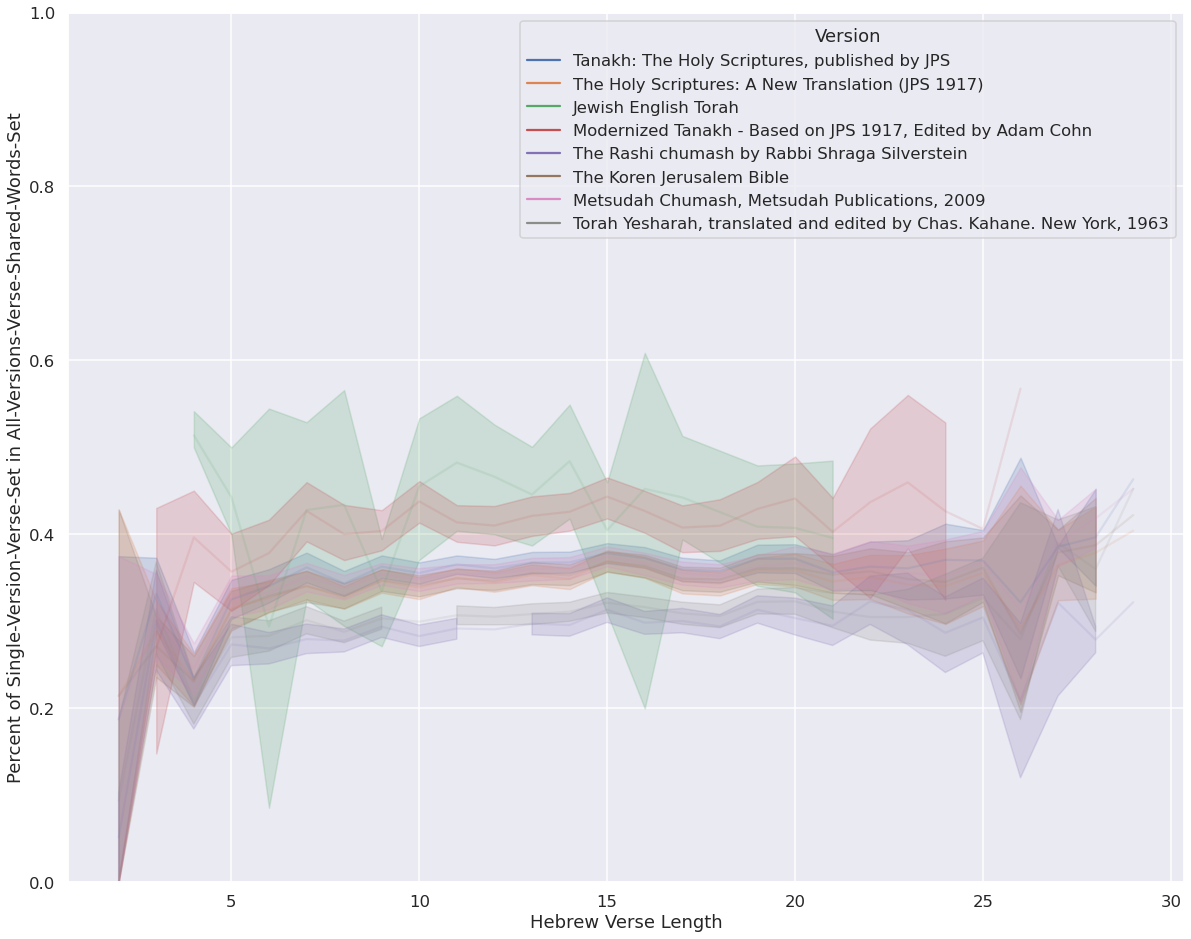

In [9]:
sns.lineplot(data=engDfLong, 
             x='Hebrew Verse Length', 
             y='Percent of Single-Version-Verse-Set in All-Versions-Verse-Shared-Words-Set', 
             hue='Version', 
             palette=palette,
             alpha=alphaParam)
plt.ylim(0,1)